In [65]:
#use L-2 MODIS A DATA 
#in accordance with Fang et al. 2018 
#Algorithim for CDOM and DOC that semms good 
import xarray as xr # top library for manipulating netcdf files
import netCDF4 # more basic library for manipulating netcdf files, used for exploring
import glob #to get file names
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import cmocean
import cmocean.cm as cmo
from glob import glob
%matplotlib inline

In [135]:
filenames = glob('../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A//*.L2_LAC_OC.x.nc')
filenames.sort()
filenames

['../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022107185000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022107185500.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022107203000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022107203500.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022108180000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022108193500.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022108194000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022109184000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022109184500.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022109202000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022110192000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022110192500.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022111183000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A202211120

In [182]:
path = filenames[0]

In [183]:
def load_satdata(path):
    data = xr.open_dataset(path, group='geophysical_data')
    navigation = xr.open_dataset(path, group='navigation_data')
    navigation = navigation.rename({'pixel_control_points': 'pixels_per_line'})
    mask = (~navigation['latitude'].isnull()) & (~navigation['longitude'].isnull())
    data = data.where(mask, drop=True)
    data['lat'] = navigation['latitude'].where(mask, drop=True)
    data['lon'] = navigation['longitude'].where(mask, drop=True)
    return data

ds = load_satdata(path)
ds

<xarray.Dataset>
Dimensions:   (number_of_lines: 468, pixels_per_line: 872)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables: (12/23)
    aot_869   (number_of_lines, pixels_per_line) float32 nan nan ... 0.0949
    angstrom  (number_of_lines, pixels_per_line) float32 nan nan ... 1.662 1.642
    Rrs_412   (number_of_lines, pixels_per_line) float32 nan nan ... 0.007814
    Rrs_443   (number_of_lines, pixels_per_line) float32 nan nan ... 0.008102
    Rrs_469   (number_of_lines, pixels_per_line) float32 nan nan ... 0.007058
    Rrs_488   (number_of_lines, pixels_per_line) float32 nan nan ... 0.006678
    ...        ...
    ipar      (number_of_lines, pixels_per_line) float32 nan nan ... 0.002114
    nflh      (number_of_lines, pixels_per_line) float32 nan nan ... -0.00641
    par       (number_of_lines, pixels_per_line) float32 54.92 58.59 ... 58.75
    l2_flags  (number_of_lines, pixels_per_line) float64 1.074e+09 ... 5.369e+08
    lat       (number_of_lines, pixels_per_line) float32 17.56 17.56 ... 19.56
    lon       (number_of_lines, pixels_per_line) float32 -79.78 ... -93.54

In [184]:
#Here we make a function for calculating a cdom 300
#ln(cdom(wl_x))= a * ln(Rrs_442) + b * ln(Rrs_488) + c * ln(Rrs_531) + d * ln(Rrs_555) + e * ln(Rrs_667) + f

a = -0.0206
A = a * np.log(ds['Rrs_443'])
b = -0.6128
B = b * np.log(ds['Rrs_488'])
c = -0.0070
C = c * np.log(ds['Rrs_531'])
d = -0.4944
D = d * np.log(ds['Rrs_555'])
e = 0.9362
E = e * np.log(ds['Rrs_667'])
f = 0.9666
ln_aCDOM_300 = A + B + C + D + E + f
aCDOM_300 = np.exp(ln_aCDOM_300)
ds['aCDOM_300'] = aCDOM_300
ds

C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


<xarray.Dataset>
Dimensions:    (number_of_lines: 468, pixels_per_line: 872)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables: (12/24)
    aot_869    (number_of_lines, pixels_per_line) float32 nan nan ... 0.0949
    angstrom   (number_of_lines, pixels_per_line) float32 nan nan ... 1.642
    Rrs_412    (number_of_lines, pixels_per_line) float32 nan nan ... 0.007814
    Rrs_443    (number_of_lines, pixels_per_line) float32 nan nan ... 0.008102
    Rrs_469    (number_of_lines, pixels_per_line) float32 nan nan ... 0.007058
    Rrs_488    (number_of_lines, pixels_per_line) float32 nan nan ... 0.006678
    ...         ...
    nflh       (number_of_lines, pixels_per_line) float32 nan nan ... -0.00641
    par        (number_of_lines, pixels_per_line) float32 54.92 58.59 ... 58.75
    l2_flags   (number_of_lines, pixels_per_line) float64 1.074e+09 ... 5.369...
    lat        (number_of_lines, pixels_per_line) float32 17.56 17.56 ... 19.56
    lon        (number_of_lines, pixels_per_line) float32 -79.78 ... -93.54
    aCDOM_300  (number_of_lines, pixels_per_line) float32 nan nan ... 0.5416

C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


<xarray.Dataset>
Dimensions:    (number_of_lines: 1062, pixels_per_line: 83)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables: (12/24)
    aot_869    (number_of_lines, pixels_per_line) float32 nan nan ... nan nan
    angstrom   (number_of_lines, pixels_per_line) float32 nan nan ... nan nan
    Rrs_412    (number_of_lines, pixels_per_line) float32 nan nan ... nan nan
    Rrs_443    (number_of_lines, pixels_per_line) float32 nan nan ... nan nan
    Rrs_469    (number_of_lines, pixels_per_line) float32 nan nan ... nan nan
    Rrs_488    (number_of_lines, pixels_per_line) float32 nan nan ... nan nan
    ...         ...
    nflh       (number_of_lines, pixels_per_line) float32 nan nan ... nan nan
    par        (number_of_lines, pixels_per_line) float32 53.79 53.47 ... nan
    l2_flags   (number_of_lines, pixels_per_line) float64 1.074e+09 ... 1.074...
    lat        (number_of_lines, pixels_per_line) float32 23.52 23.51 ... 31.91
    lon        (number_of_lines, pixels_per_line) float32 -77.8 ... -84.09
    aCDOM_300  (number_of_lines, pixels_per_line) float32 nan nan ... nan nan

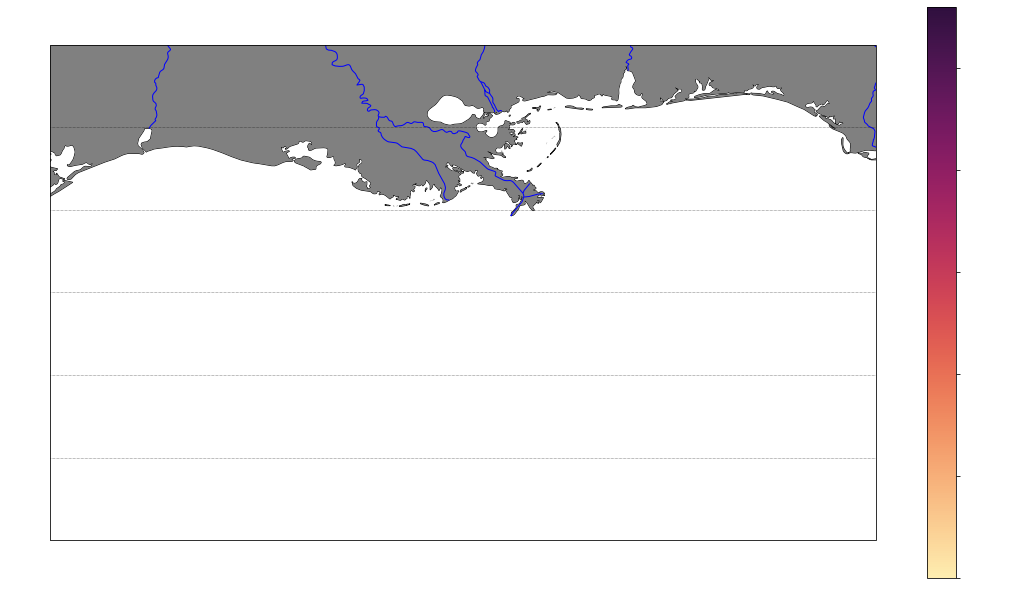

In [196]:
path = filenames[4] 
ds = load_satdata(path)

a = -0.0206
A = a * np.log(ds['Rrs_443'])
b = -0.6128
B = b * np.log(ds['Rrs_488'])
c = -0.0070
C = c * np.log(ds['Rrs_531'])
d = -0.4944
D = d * np.log(ds['Rrs_555'])
e = 0.9362
E = e * np.log(ds['Rrs_667'])
f = 0.9666
ln_aCDOM_300 = A + B + C + D + E + f
aCDOM_300 = np.exp(ln_aCDOM_300)
ds['aCDOM_300'] = aCDOM_300

fig, ax = plot_mapbase(extent)
satdata = ax.pcolormesh(ds['lon'], ds['lat'], ds['aCDOM_300'], cmap=cmo.matter, transform=ccrs.PlateCarree())
cb = fig.colorbar(satdata)
cb.ax.tick_params(labelcolor='w') 
cb.set_label('Surface Water\n'+'a$_{CDOM}$ (300 nm) (1/m)', size=20, weight='bold', color='w')
tick_font_size = 16
cb.ax.tick_params(labelsize=tick_font_size)

fig.set_size_inches(18.5, 10.5)
ds

In [99]:
#making the map

lat_top=31
lat_bot=25
lon_left=-85
lon_rigth=-95
extent=[lon_left, lon_rigth, lat_bot, lat_top]

def plot_mapbase(extent, res='10m', projection=ccrs.PlateCarree()):
    fig = plt.figure(figsize=(10,5)) # set fig size
    ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue', # change color here
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'white'}
    gl.ylabel_style = {'size': 15, 'color': 'white'}
    return fig, ax

In [89]:
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"}
plt.rcParams.update(params)

C:\Users\12532\AppData\Local\Temp\ipykernel_13204\240230276.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,5)) # set fig size


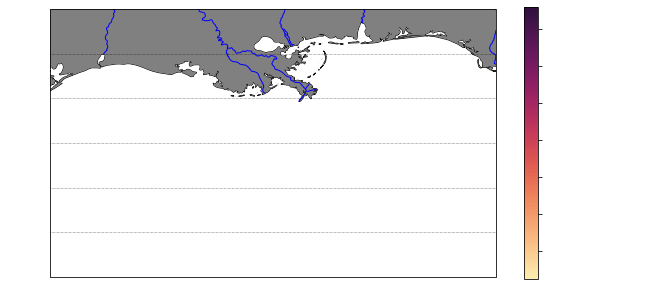

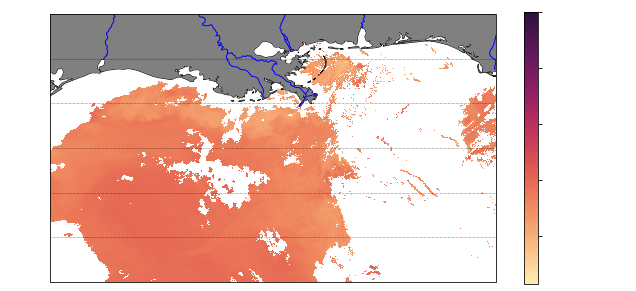

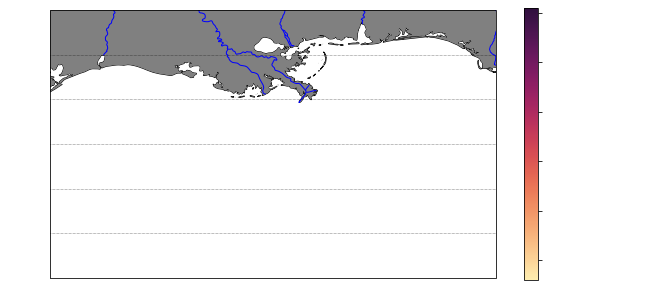

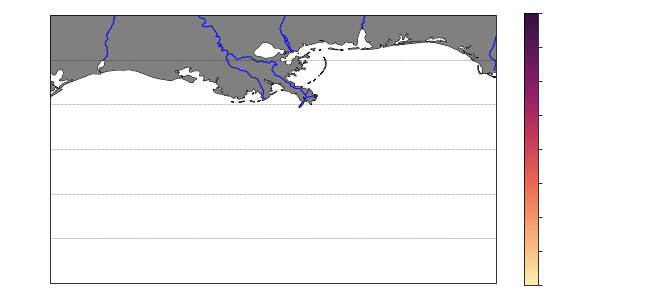

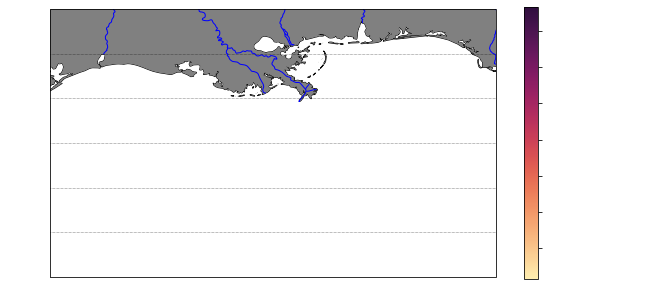

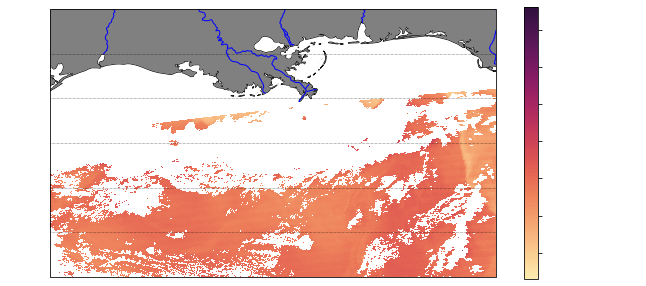

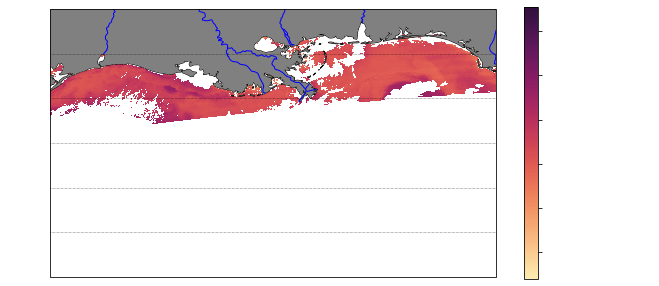

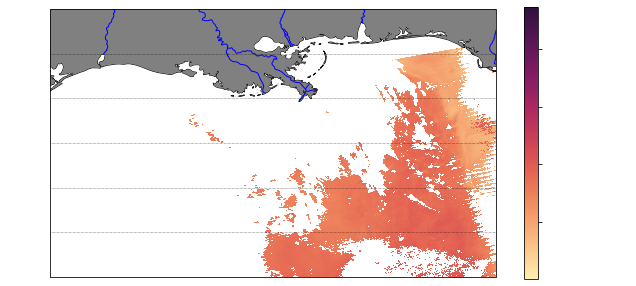

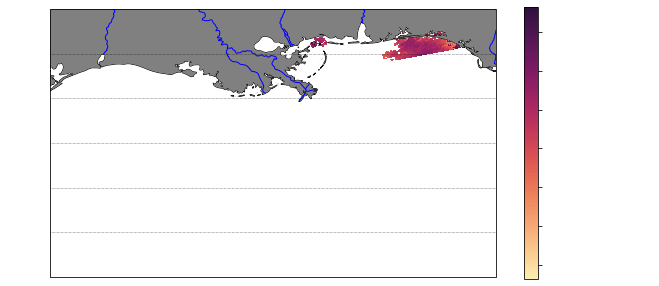

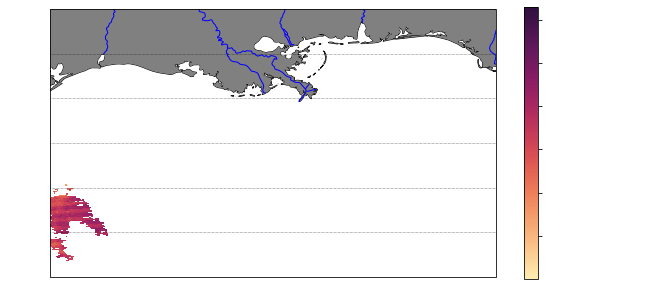

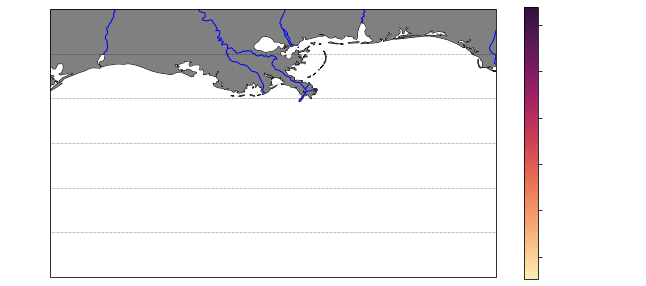

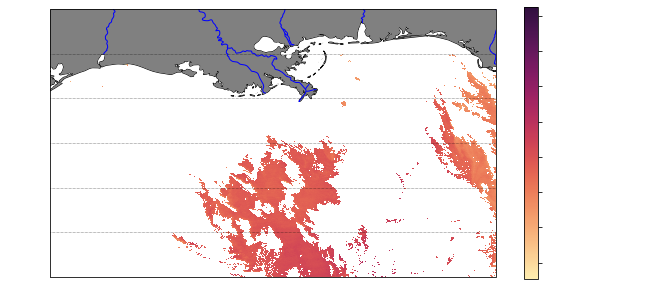

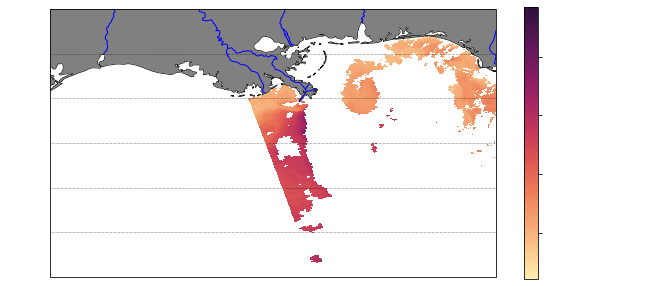

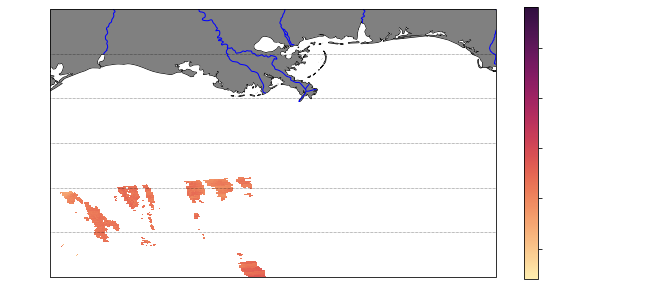

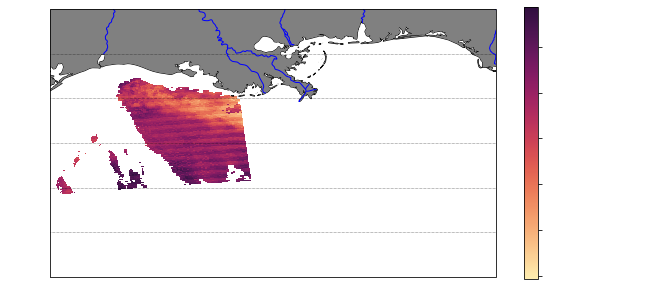

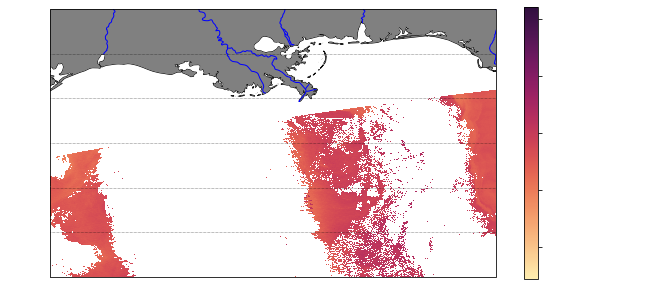

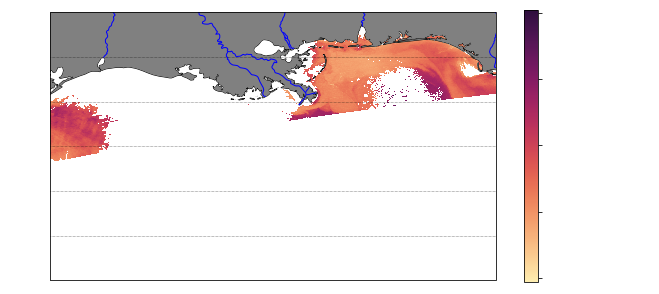

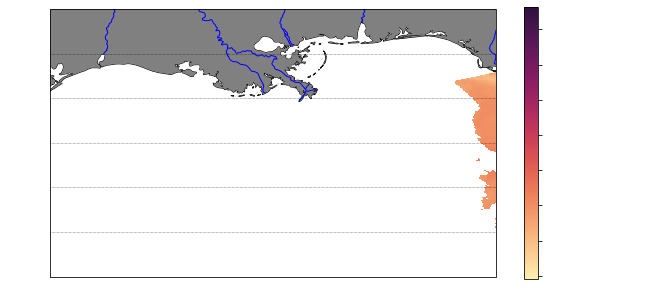

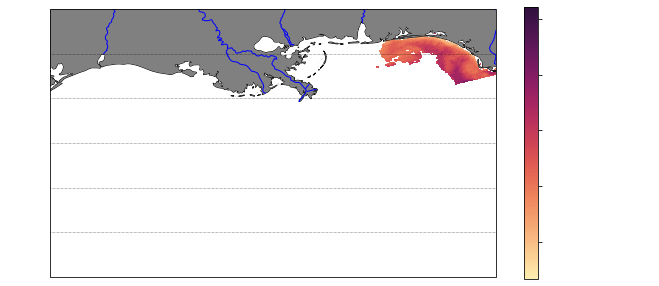

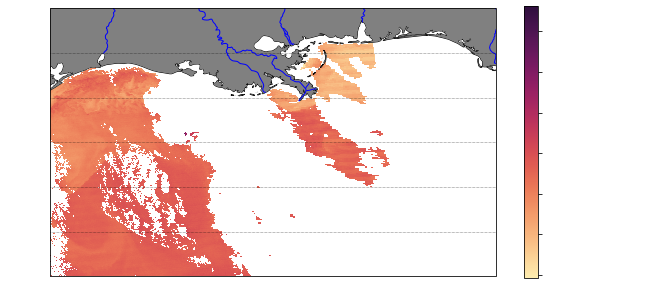

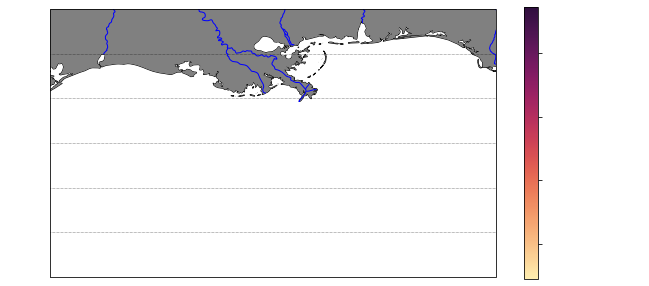

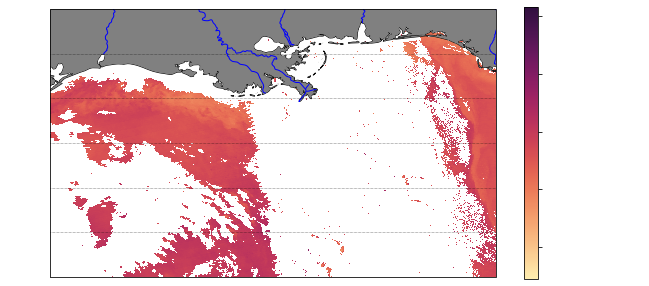

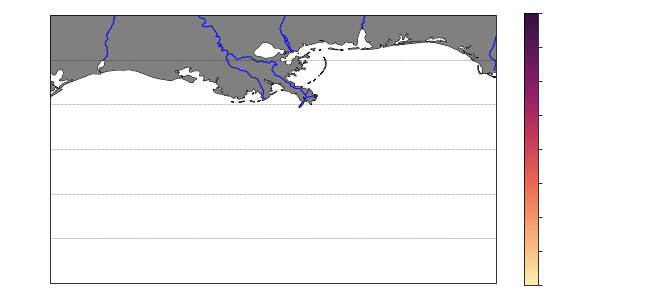

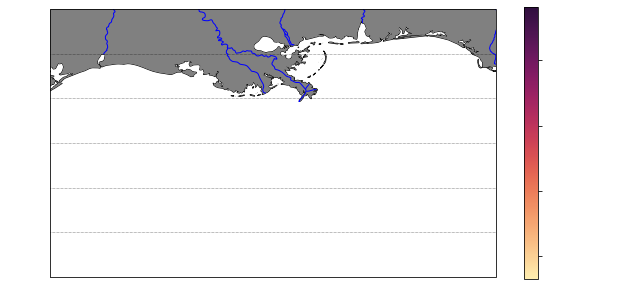

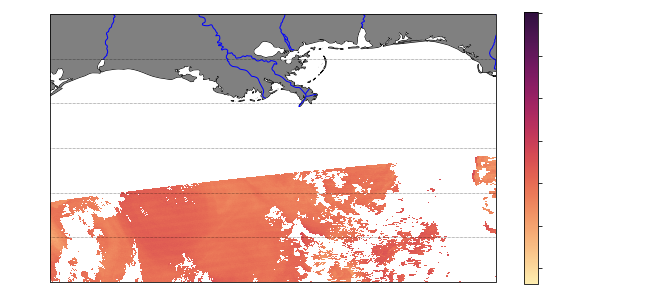

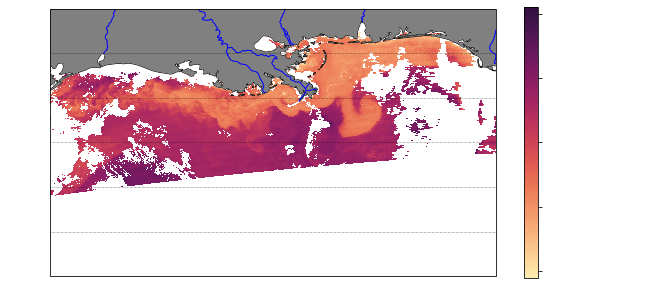

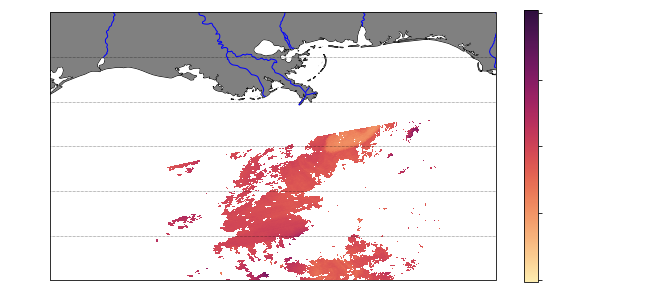

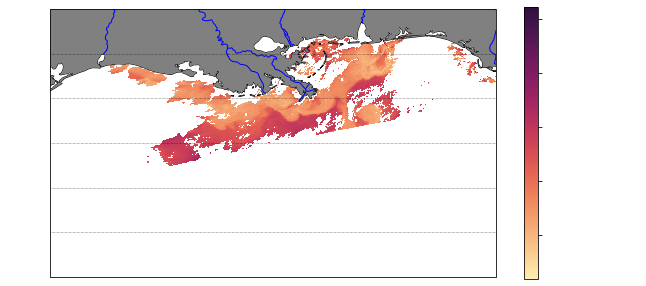

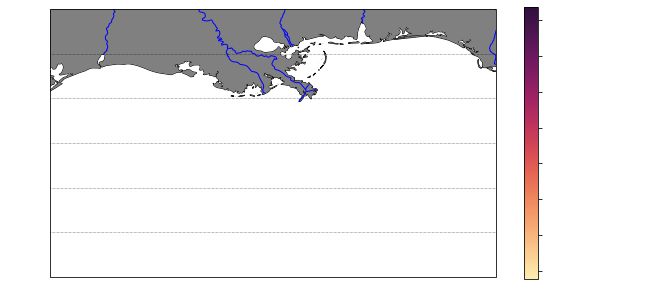

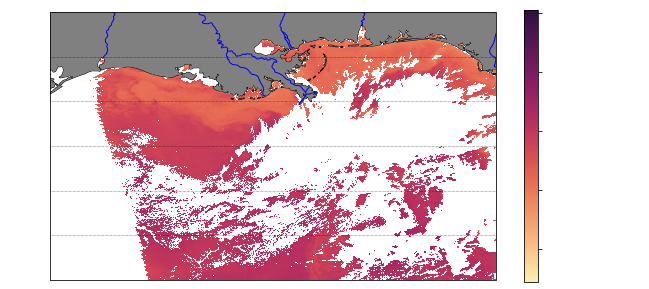

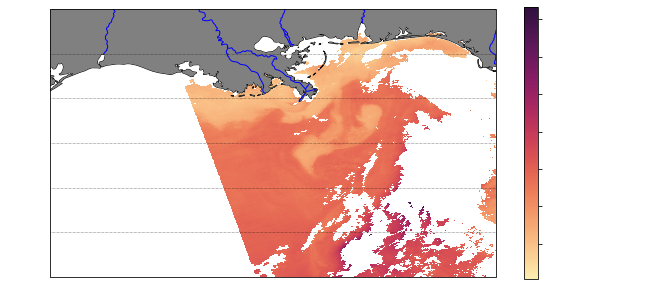

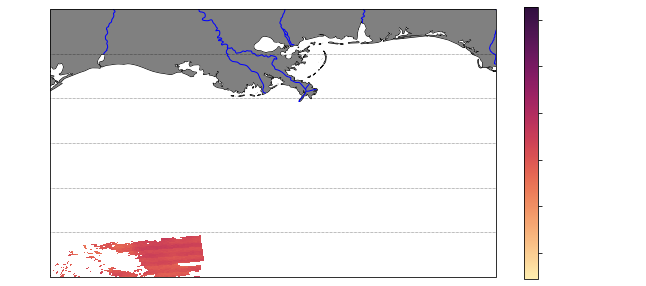

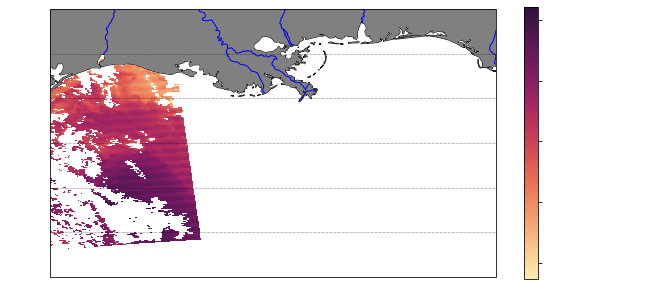

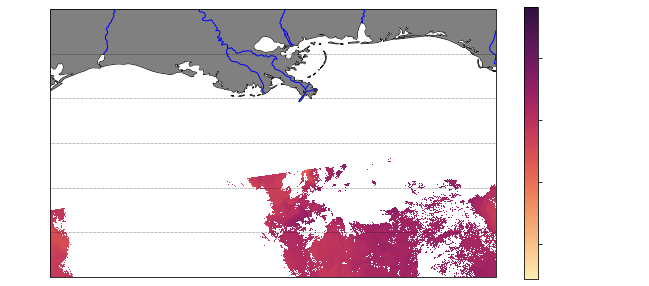

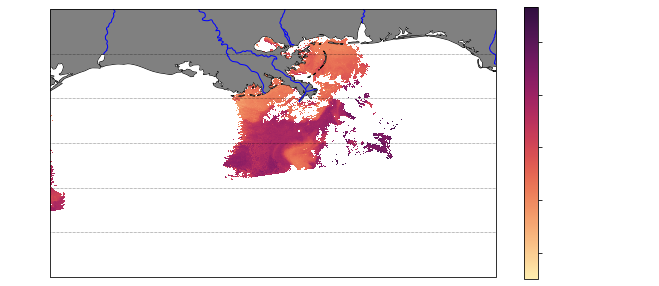

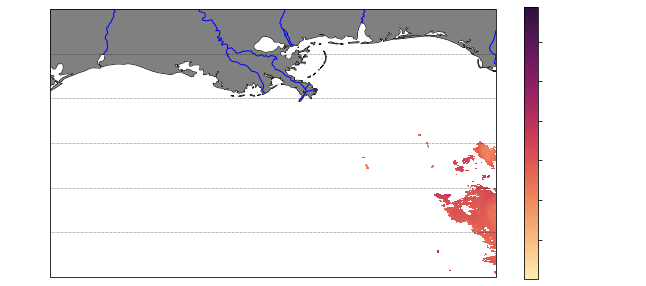

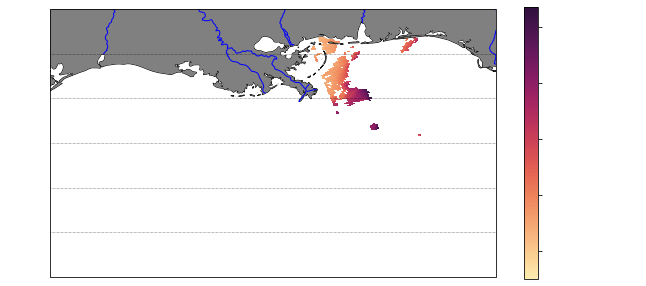

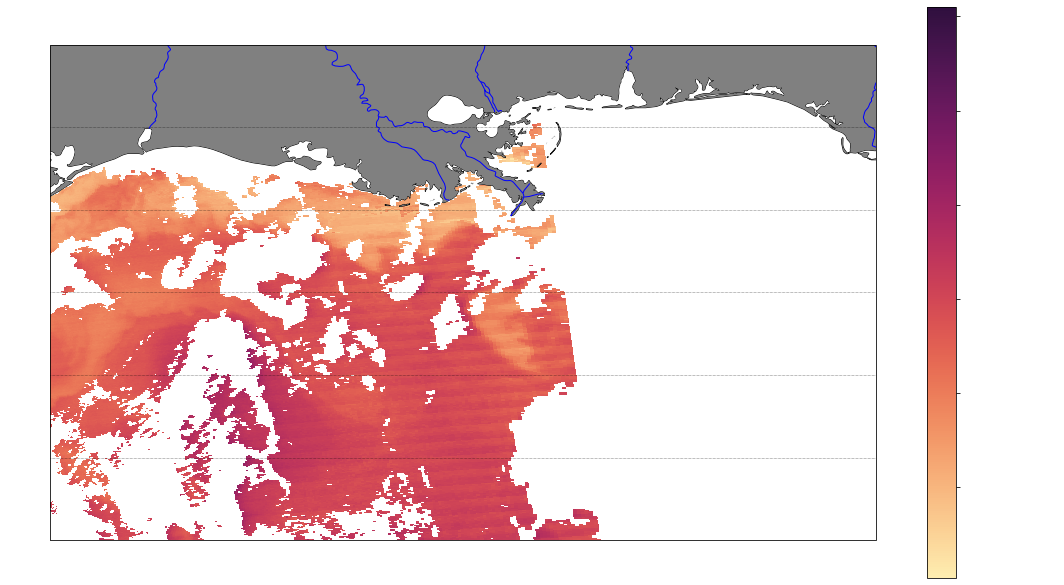

In [147]:
for file in filenames: 
    path = file 
    ds = load_satdata(path)
    fig, ax = plot_mapbase(extent)
    satdata = ax.pcolormesh(ds['lon'], ds['lat'], ds['Rrs_412'], cmap=cmo.matter, transform=ccrs.PlateCarree())
    cb = fig.colorbar(satdata)
    cb.ax.tick_params(labelcolor='w') 
    cb.set_label('Surface Water\n'+'a$_{CDOM}$ (300 nm) (1/m)', size=20, weight='bold', color='w')
    tick_font_size = 16
    cb.ax.tick_params(labelsize=tick_font_size)
    set_title = file
fig.set_size_inches(18.5, 10.5)